In [1]:
#First, all the necessary libraries is imported into the workspace to ensure that their respective features and functionalities can be executed properly.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, adjusted_rand_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans


**`Importing of the datasets`**



In [2]:
!kaggle datasets download -d uciml/red-wine-quality-cortez-et-al-2009

Dataset URL: https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009
License(s): DbCL-1.0
  0% 0.00/25.6k [00:00<?, ?B/s]
100% 25.6k/25.6k [00:00<00:00, 25.7MB/s]


In [3]:
# Importing of the file with the help of pandas libraries. also delimiter will going to help separate the text strings
Wine_data  = pd.read_csv("/content/red-wine-quality-cortez-et-al-2009.zip", delimiter=",")
print(Wine_data)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

**`Understanding of the dataset, preprocessing and visualization of the dataset
`**

In [4]:
#Shape feature will be going to help provide the dimensions of the datasets.
print(Wine_data.shape)
#The `isna()` function will help identify any missing values in the dataset. This is crucial for determining if preprocessing techniques need to be implemented to fill in any blank spaces.
print(Wine_data.isna().sum())

(1599, 12)
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [5]:
#Once the data been imported, then describe feature will help to provide the cumulative summary of the data.
Wine_data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [6]:
print(Wine_data.head)
# The dataset is categorized into a new data range to improve accuracy. The ranges are defined as follows: 0 for low, 1 for medium, and 2 for high.
bins = [2, 4, 6, 8]
# 0: low, 1: medium, 2: high
labels = [0, 1, 2]

#pandas.pydata.org. (n.d.). pandas.cut — pandas 2.1.1 documentation. [online] Available at: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html.
#The `pd.cut` function converts continuous variables into discrete categories.
Wine_data['quality'] = pd.cut(Wine_data['quality'], bins=bins, labels=labels)

<bound method NDFrame.head of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067  

In [7]:
print(Wine_data.info)

#Presence of null values is checked after implementing the bins feature.
print(Wine_data.isna().sum())

<bound method DataFrame.info of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067

In [8]:
#The correlation matrix helps to understand the relationships between different features in the dataset.
Wine_data.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.125886         -0.333816     0.228930   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.114777   0.093705            -0.153794   
volatile acidity            0.001918   0.061298            -0.010504   
citric acid                 0.143577   0.203823            -0.060978   
residual sugar              1.000000   0.055610             0.187049   
chlorides                   0.055610   1.000000             0.005562   
free sulfur dioxide         0.187049   0.005562             1.000000   
total sulfur dioxide        0.203028   0.047400             0.667666   
density                     0.355283   0.200632            -0.021946   
pH                         -0.085652  -0.265026             0.070377   
sulphates                   0.005527   0.371260             0.051658   
alcohol                     0.042075  -0.221141            -0.069408   
quality                     0.030153  -0.098829            -0.025075   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.113181  0.668047 -0.682978   0.183006   
volatile acidity                  0.076470  0.022026  0.234937  -0.260987   
citric acid                       0.035533  0.364947 -0.541904   0.312770   
residual sugar                    0.203028  0.355283 -0.085652   0.005527   
chlorides                         0.047400  0.200632 -0.265026   0.371260   
free sulfur dioxide               0.667666 -0.021946  0.070377   0.051658   
total sulfur dioxide              1.000000  0.071269 -0.066495   0.042947   
density                           0.071269  1.000000 -0.341699   0.148506   
pH                               -0.066495 -0.341699  1.000000  -0.196648   
sulphates                         0.042947  0.148506 -0.196648   1.000000   
alcohol                          -0.205654 -0.496180  0.205633   0.093595   
quality                          -0.081960 -0.123566 -0.093946   0.205409   

                       alcohol   quality  
fixed acidity        -0.061668  0.125886  
volatile acidity     -0.202288 -0.333816  
citric acid           0.109903  0.228930  
residual sugar        0.042075  0.030153  
chlorides            -0.221141 -0.098829  
free sulfur dioxide  -0.069408 -0.025075  
total sulfur dioxide -0.205654 -0.081960  
density              -0.496180 -0.123566  
pH                    0.205633 -0.093946  
sulphates             0.093595  0.205409  
alcohol               1.000000  0.361363  
quality               0.361363  1.000000

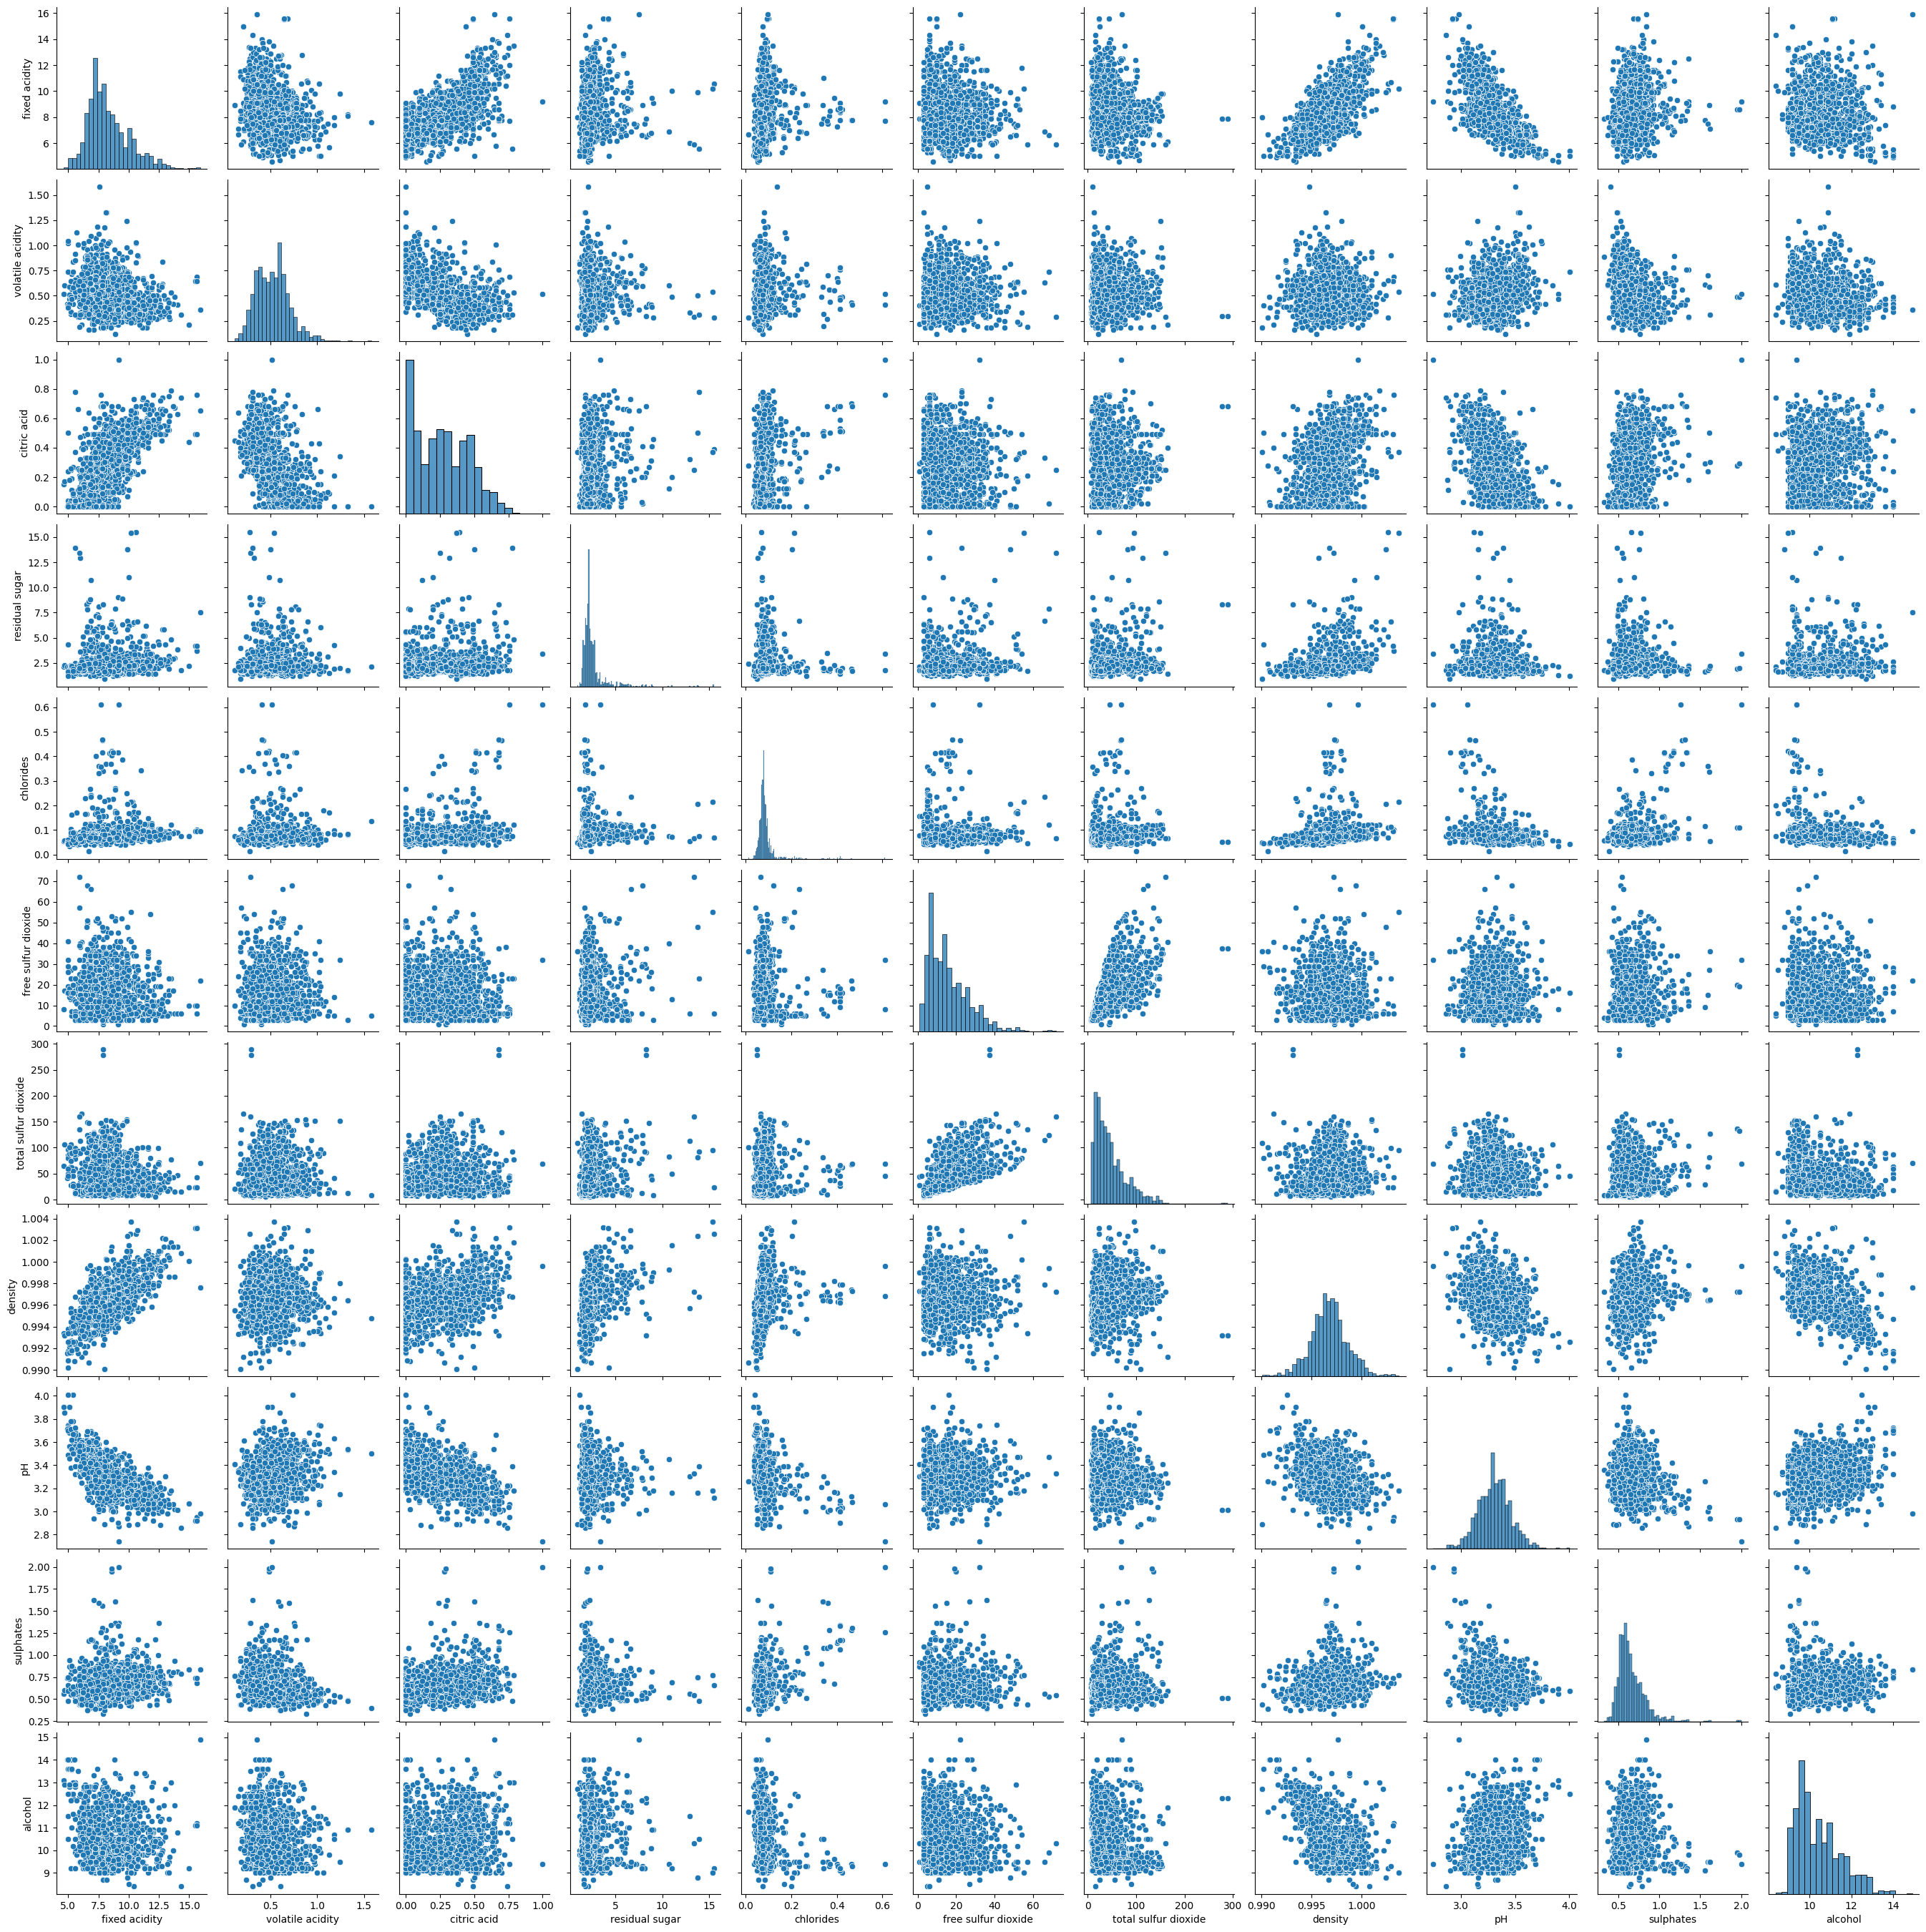

In [9]:
#The pairplot provides a comprehensive view of relationships between pairs of variables and their individual distributions.
sns.pairplot(Wine_data)

<Figure size 500x200 with 0 Axes>

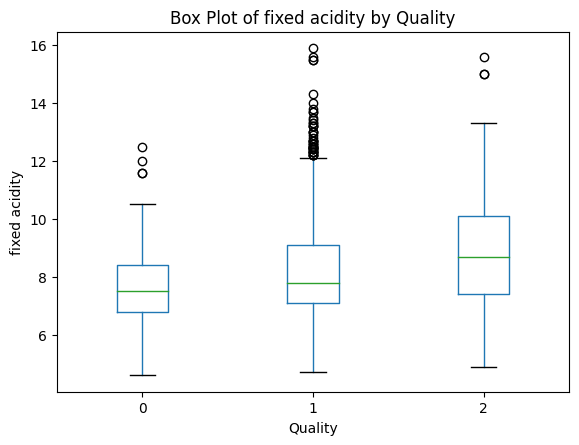

<Figure size 500x200 with 0 Axes>

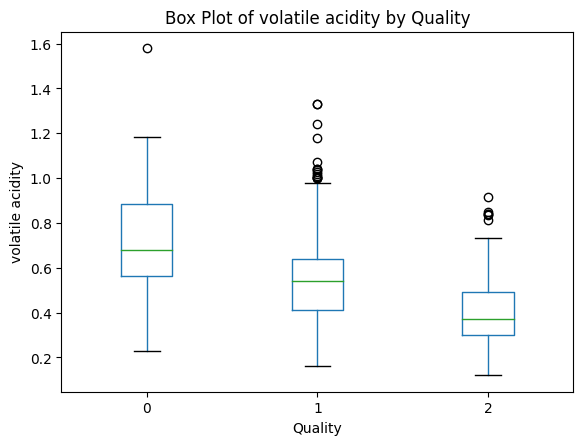

<Figure size 500x200 with 0 Axes>

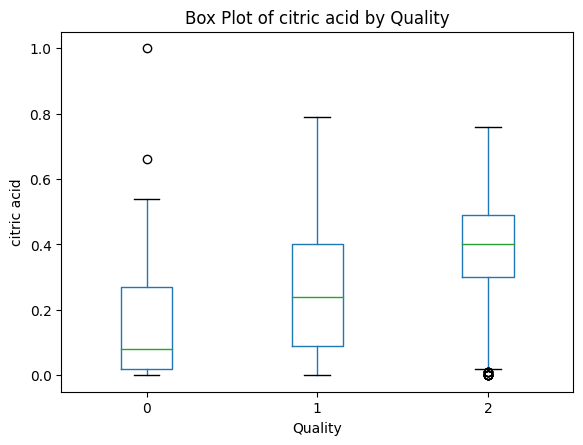

<Figure size 500x200 with 0 Axes>

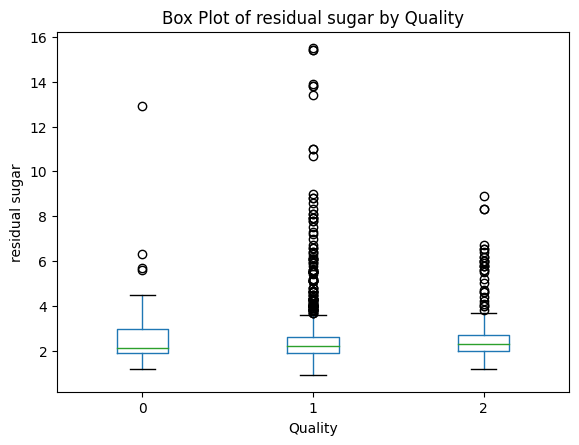

<Figure size 500x200 with 0 Axes>

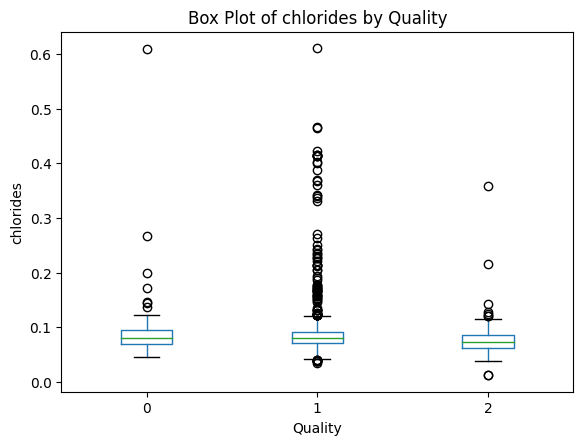

<Figure size 500x200 with 0 Axes>

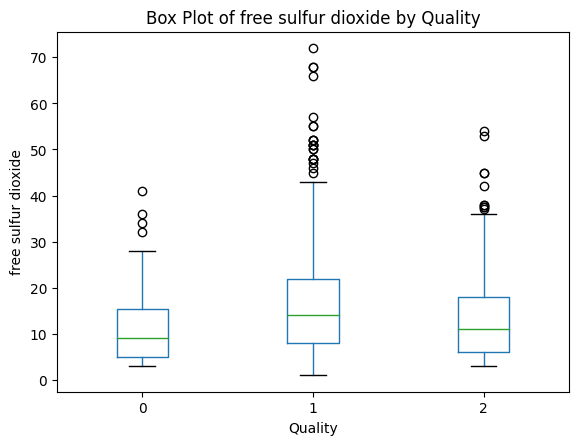

<Figure size 500x200 with 0 Axes>

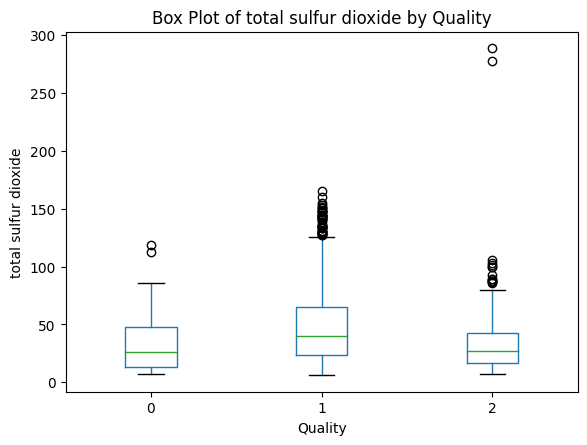

<Figure size 500x200 with 0 Axes>

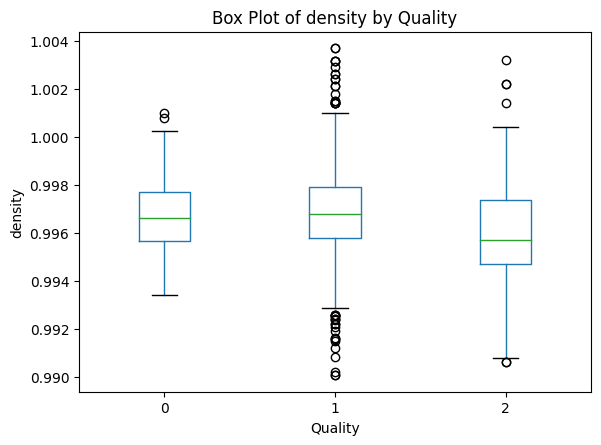

<Figure size 500x200 with 0 Axes>

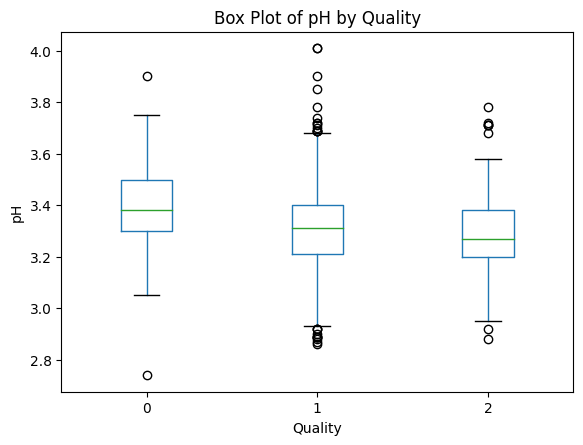

<Figure size 500x200 with 0 Axes>

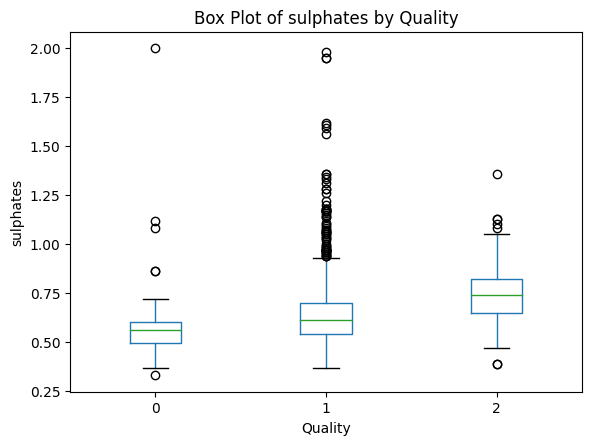

<Figure size 500x200 with 0 Axes>

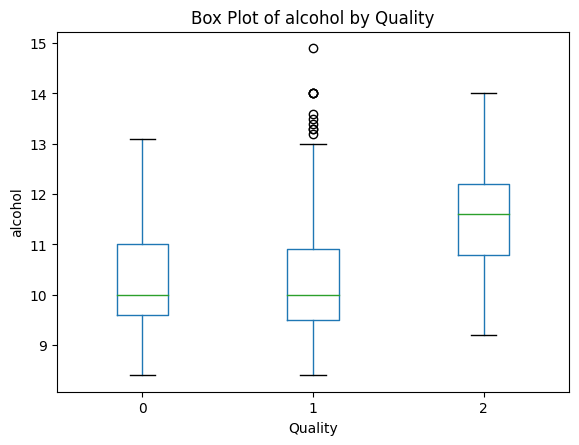

In [10]:
# The box plot helps to identify outliers in the dataset. A loop is created to visualize each feature.
for column in Wine_data.columns[:-1]:
    plt.figure(figsize=(5, 2))
    Wine_data.boxplot(column=column, by='quality', grid=False)
    plt.title(f'Box Plot of {column} by Quality')
    plt.suptitle('')
    plt.xlabel('Quality')
    plt.ylabel(column)
    plt.show()

**Separating the dependent variables and independent variables to evaluate the model**



In [11]:
# After preprocessing, the data is divided into dependent variables and features used to predict the target variable.
X = Wine_data.drop("quality", axis = 1)
y = Wine_data["quality"]

In [12]:
imputer = SimpleImputer(strategy='mean')
# Fit the imputer and transform the features DataFrame to handle missing values.
X= pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [13]:
#The `train_test_split` function will split the data into training (80%) and testing (20%) sets.
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
print(y.isna().sum())

0


In [15]:
# The `StandardScaler` is used to standardize the features of the dataset.
SD = StandardScaler()
X_train = SD.fit_transform(X_train)
X_test = SD.transform(X_test)

In [16]:
print(X_train.shape)
print(X_test.shape)

(1279, 11)
(320, 11)


In [17]:
print(y_train.shape)
print(y_test.shape)

(1279,)
(320,)


**The SVM Model is going to be implemented on the train and test dataset**


In [18]:
#The Support Vector Classifier (SVC) with a linear kernel is trained. This is suitable for linearly separable data, resulting in a straight-line decision boundary.
svc = SVC(kernel = 'linear')
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)
svc_acc_score = accuracy_score(y_test, y_pred_svc)
svc_cross_val_score = cross_val_score(svc, X, y, scoring='accuracy', cv = 10)
print("SVC  classification - Accuracy:", svc_acc_score)
print("SVC Cross validation score:", svc_cross_val_score)

SVC  classification - Accuracy: 0.81875
SVC Cross validation score: [0.825      0.825      0.825      0.825      0.825      0.825
 0.825      0.825      0.825      0.82389937]


In [19]:
#The Radial Basis Function (RBF) kernel is used for non-linear data. The gamma parameter defines the influence of a single training example.
#scikit-learn (2019). sklearn.svm.SVC — scikit-learn 0.22 documentation. [online] Scikit-learn.org. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html.

svc_rbf = SVC(kernel='rbf', gamma='scale', C=1.0)
svc_rbf.fit(X_train, y_train)
y_pred_svc_rbf = svc_rbf.predict(X_test)

In [20]:
# Svc_acc_score: - The accuracy of the SVC model is evaluated.
#svc_rbf_conf_matrix: - The confusion matrix helps evaluate the detailed performance of the classification model.
#Classification_matrix: - The classification matrix provides precision, recall, F1-score, and support for each class.
svc_rbf_acc_score = accuracy_score(y_test, y_pred_svc_rbf)
svc_rbf_conf_matrix = confusion_matrix(y_test, y_pred_svc_rbf)
svc_rbf_cross_val_score = cross_val_score(svc_rbf, X, y, scoring='accuracy', cv = 10)
print("SVC - Accuracy Score:", svc_rbf_acc_score)
print("SVC Cross validation score:", svc_rbf_cross_val_score)
print("SVC - Confusion Matrix: \n",svc_rbf_conf_matrix)

SVC - Accuracy Score: 0.840625
SVC Cross validation score: [0.825      0.825      0.825      0.825      0.825      0.825
 0.825      0.825      0.825      0.82389937]
SVC - Confusion Matrix: 
 [[  0  11   0]
 [  0 257   5]
 [  0  35  12]]


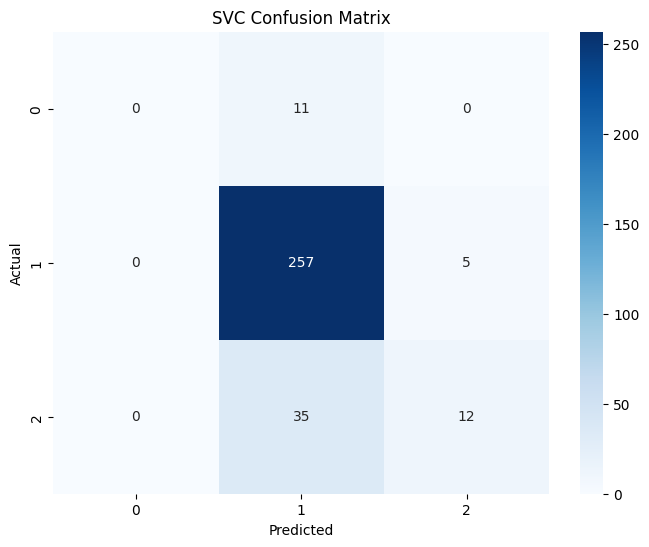

In [21]:
# A confusion matrix is plotted to present the prediction and actual data.
plt.figure(figsize=(8, 6))
sns.heatmap(svc_rbf_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('SVC Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**The MLP (Multilayer Perceptrons) Model is going to be implemented on the train and test dataset**


In [22]:
# Predefined layer sizes and configurations are implemented to define the architecture of the neural network. The activation function used is ReLU, and the solver is Adaptive Moment Estimation.
#scikit-learn (2010). sklearn.neural_network.MLPClassifier — scikit-learn 0.20.3 documentation. [online] Scikit-learn.org. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html.

mlp = MLPClassifier(hidden_layer_sizes=(25, 18, 10, 5), activation='relu', solver='adam', random_state=42, max_iter=2000, learning_rate_init=0.001)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)


In [23]:
mlp_acc_score = accuracy_score(y_test, y_pred_mlp)
mlp_conf_matrix = confusion_matrix(y_test, y_pred_mlp)
mlp_class_report = classification_report(y_test, y_pred_mlp, zero_division=1)
mlp_cross_val_score = cross_val_score(mlp, X, y, scoring='accuracy', cv = 10)

print("MLP - Cross validation score : \n",mlp_cross_val_score)

print("MLP Classification - Accuracy Score:", mlp_acc_score)
print("MLP Classification - Confusion Matrix:\n", mlp_conf_matrix)
print("MLP Classification - Classification Report:\n", mlp_class_report)

MLP - Cross validation score : 
 [0.81875    0.8375     0.83125    0.81875    0.8375     0.85
 0.775      0.8125     0.85       0.83018868]
MLP Classification - Accuracy Score: 0.840625
MLP Classification - Confusion Matrix:
 [[  1  10   0]
 [  9 239  14]
 [  0  18  29]]
MLP Classification - Classification Report:
               precision    recall  f1-score   support

           0       0.10      0.09      0.10        11
           1       0.90      0.91      0.90       262
           2       0.67      0.62      0.64        47

    accuracy                           0.84       320
   macro avg       0.56      0.54      0.55       320
weighted avg       0.84      0.84      0.84       320



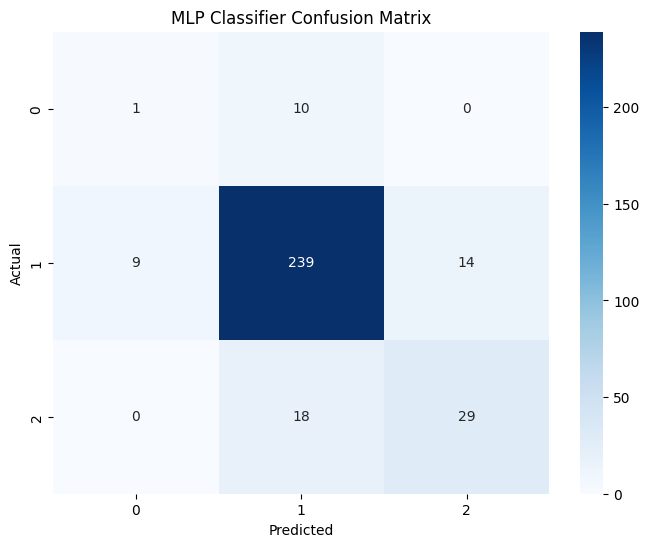

In [24]:
# The confusion matrix for the MLP classifier is generated.
plt.figure(figsize=(8, 6))
sns.heatmap(mlp_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('MLP Classifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [43]:
# The shapes of the training data (X_train) are noted.
#X_train.shape is equal to 319, X_train.shape[1] = 11
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
# X_train.shape is equal to 1280, X_train.shape[1] = 11
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

#Stack Overflow. (n.d.). Convert categorical data back to numbers using keras utils to_categorical. [online] Available at: https://stackoverflow.com/questions/54143458/convert-categorical-data-back-to-numbers-using-keras-utils-to-categorical [Accessed 29 May 2024].
y_train_categorical = tf.keras.utils.to_categorical(y_train)
y_test_categorical = tf.keras.utils.to_categorical(y_test)


In [44]:
#Conv1D: Conv1D applies convolutional filters to extract features.
#MaxPooling1D: MaxPooling1D reduces spatial dimensions while retaining important features.
#Dropout: Dropout prevents overfitting by randomly setting input units to zero.
#Dense: Dense layers are used for classification or regression tasks.
#Flatten: Flatten converts multidimensional input into a single-dimensional vector.
#pool_size: Pool size defines the size of the pooling window in MaxPooling layers.

cnn_model = Sequential([
    Conv1D(32, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),
    Conv1D(64, kernel_size=2, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),
    Conv1D(128, kernel_size=2, activation='relu'),
    Flatten(),
    Dense(50, activation='relu'),
    Dropout(0.2),
    Dense(y_train_categorical.shape[1], activation='softmax')
])

In [45]:
#The model is compiled using appropriate configurations.
#www.datacamp.com. (n.d.). Python Convolutional Neural Networks (CNN) with TensorFlow Tutorial. [online] Available at: https://www.datacamp.com/tutorial/cnn-tensorflow-python.

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# The model is trained with the training data.
history = cnn_model.fit(X_train_cnn, y_train_categorical, epochs=50, batch_size=30, validation_data=(X_test_cnn, y_test_categorical))

# The model's performance is evaluated.
loss, accuracy_cnn = cnn_model.evaluate(X_test_cnn, y_test_categorical)
print("CNN Accuracy:", accuracy_cnn)

Epoch 1/50
43/43 [==============================] - 3s 16ms/step - loss: 0.7376 - accuracy: 0.7873 - val_loss: 0.6378 - val_accuracy: 0.8188
Epoch 2/50
43/43 [==============================] - 0s 7ms/step - loss: 0.5976 - accuracy: 0.8264 - val_loss: 0.5933 - val_accuracy: 0.8188
Epoch 3/50
43/43 [==============================] - 0s 8ms/step - loss: 0.5580 - accuracy: 0.8264 - val_loss: 0.5557 - val_accuracy: 0.8188
Epoch 4/50
43/43 [==============================] - 0s 7ms/step - loss: 0.5575 - accuracy: 0.8256 - val_loss: 0.5332 - val_accuracy: 0.8188
Epoch 5/50
43/43 [==============================] - 0s 8ms/step - loss: 0.5160 - accuracy: 0.8272 - val_loss: 0.5273 - val_accuracy: 0.8188
Epoch 6/50
43/43 [==============================] - 0s 6ms/step - loss: 0.5152 - accuracy: 0.8241 - val_loss: 0.4925 - val_accuracy: 0.8188
Epoch 7/50
43/43 [==============================] - 0s 4ms/step - loss: 0.5003 - accuracy: 0.8264 - val_loss: 0.4930 - val_accuracy: 0.8188
Epoch 8/50
43/43 [=

In [46]:
# Predictions are made and converted to class labels.
y_pred_cnn = cnn_model.predict(X_test_cnn)
y_pred_cnn_class = np.argmax(y_pred_cnn, axis=1)

# Confusion matrix and accuracy score for CNN are generated.
cnn_confusion_matrix = confusion_matrix(y_test, y_pred_cnn_class)
cnn_acc_score = accuracy_score(y_test, y_pred_cnn_class)
print("CNN Confusion Matrix:\n", cnn_confusion_matrix)
print("CNN Accuracy Score:", cnn_acc_score)
print(classification_report(y_test, y_pred_cnn_class,zero_division=0))

10/10 [==============================] - 0s 2ms/step
CNN Confusion Matrix:
 [[  0  11   0]
 [  0 251  11]
 [  0  25  22]]
CNN Accuracy Score: 0.853125
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.87      0.96      0.91       262
           2       0.67      0.47      0.55        47

    accuracy                           0.85       320
   macro avg       0.51      0.48      0.49       320
weighted avg       0.81      0.85      0.83       320



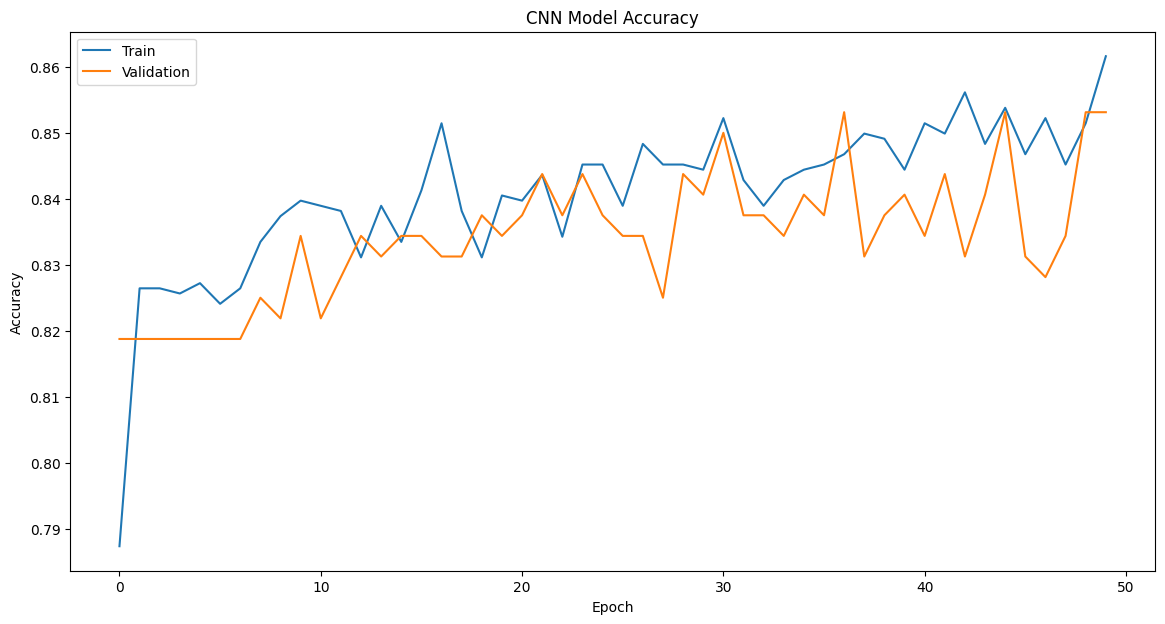

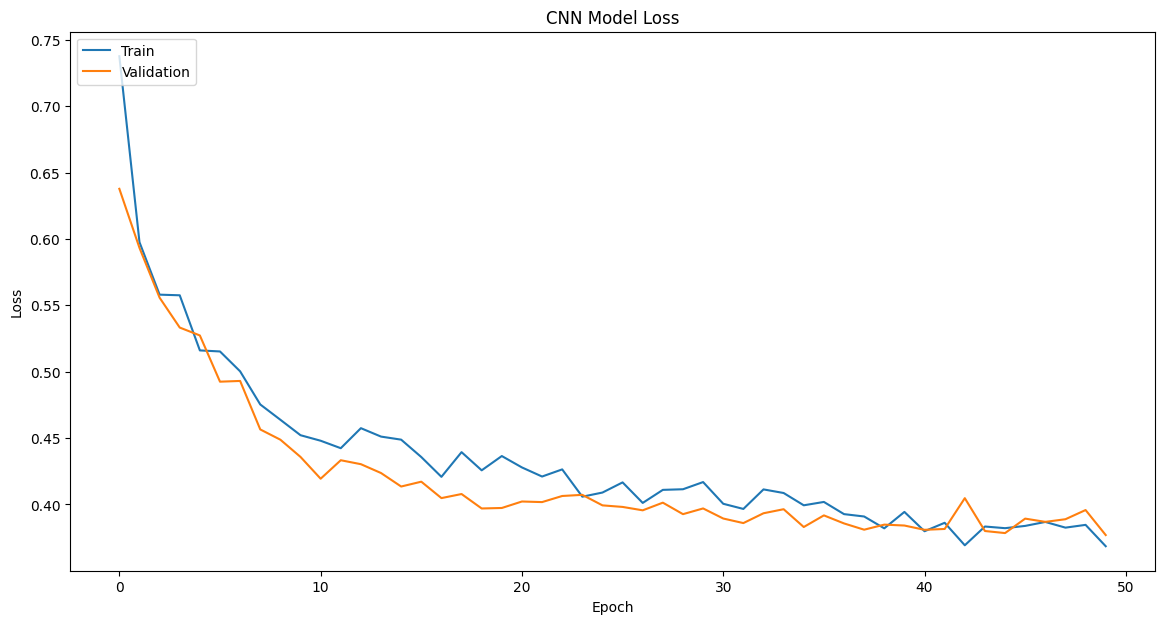

In [47]:
# Training and validation accuracy values are plotted.
plt.figure(figsize=(14, 7))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Training and validation loss values are plotted.
plt.figure(figsize=(14, 7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Other Model to look which model provides us more accuracy**

In [48]:
# The KNeighborsClassifier is used to evaluate its suitability for the dataset.
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [49]:
#The accuracy, confusion matrix, and classification report for KNN are generated.
knn_acc_score = accuracy_score(y_test, y_pred_knn)
knn_conf_matrix = confusion_matrix(y_test, y_pred_knn)
knn_class_report = classification_report(y_test, y_pred_knn, zero_division=1)
knn_cross_val_score = cross_val_score(knn, X, y, scoring='accuracy', cv = 10)
print("KNN - Cross validation score : \n",knn_cross_val_score)
print("KNN Classification - Accuracy Score:", knn_acc_score)
print("KNN Classification - Confusion Matrix:\n", knn_conf_matrix)
print("KNN Classification - Classification Report:\n", knn_class_report)

KNN - Cross validation score : 
 [0.8125     0.80625    0.81875    0.8        0.84375    0.80625
 0.775      0.79375    0.8375     0.82389937]
KNN Classification - Accuracy Score: 0.84375
KNN Classification - Confusion Matrix:
 [[  0  11   0]
 [  1 253   8]
 [  0  30  17]]
KNN Classification - Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.86      0.97      0.91       262
           2       0.68      0.36      0.47        47

    accuracy                           0.84       320
   macro avg       0.51      0.44      0.46       320
weighted avg       0.80      0.84      0.81       320



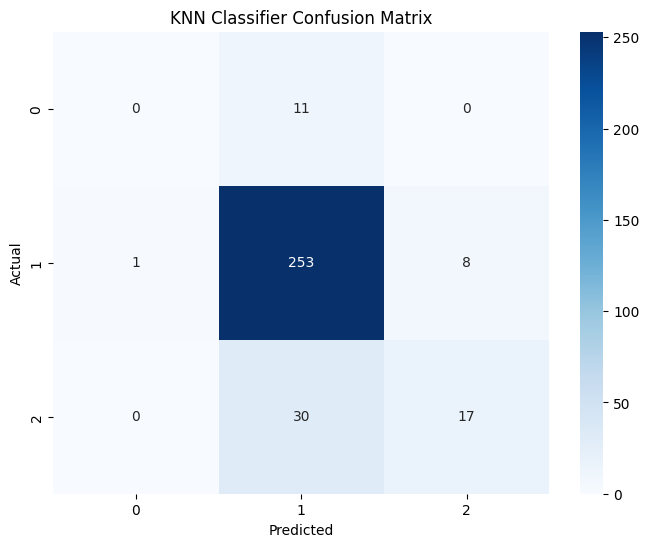

In [50]:
# The confusion matrix for the dataset is presented.
plt.figure(figsize=(8, 6))
sns.heatmap(knn_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('KNN Classifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [51]:
# RandomForestClassification model:In a random forest classification, multiple decision trees are created using different random subsets of the data and features. Predictions are made by aggregating the results from all decision trees.

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [52]:
#The Random Forest model is evaluated.
rf_confusion_matrix = confusion_matrix(y_test, y_pred_rf)
rf_acc_score = accuracy_score(y_test, y_pred_rf)
rf_cross_val_score = cross_val_score(rf_model, X, y, scoring='accuracy', cv = 10)

print("Random Forest- Cross validation score : \n",rf_cross_val_score)
print("Random Forest Confusion Matrix:\n", rf_confusion_matrix)
print("Random Forest Accuracy Score:", rf_acc_score)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf,zero_division=0))


Random Forest- Cross validation score : 
 [0.825     0.85625   0.8375    0.8       0.8625    0.83125   0.81875
 0.85625   0.825     0.8490566]
Random Forest Confusion Matrix:
 [[  0  11   0]
 [  0 251  11]
 [  0  20  27]]
Random Forest Accuracy Score: 0.86875
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.89      0.96      0.92       262
           2       0.71      0.57      0.64        47

    accuracy                           0.87       320
   macro avg       0.53      0.51      0.52       320
weighted avg       0.83      0.87      0.85       320



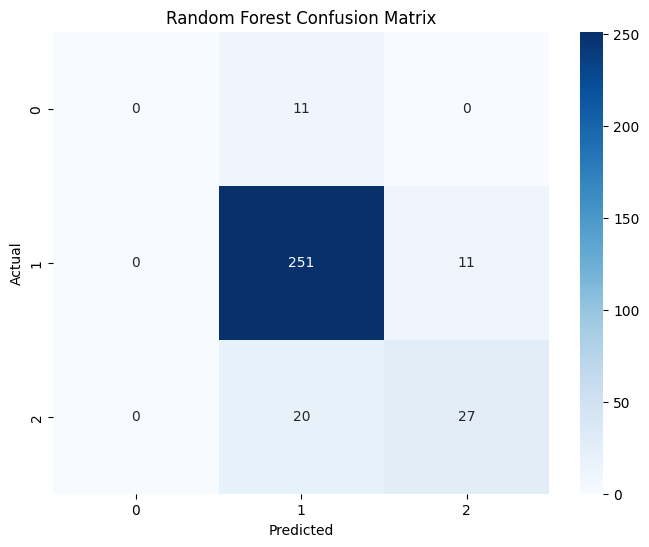

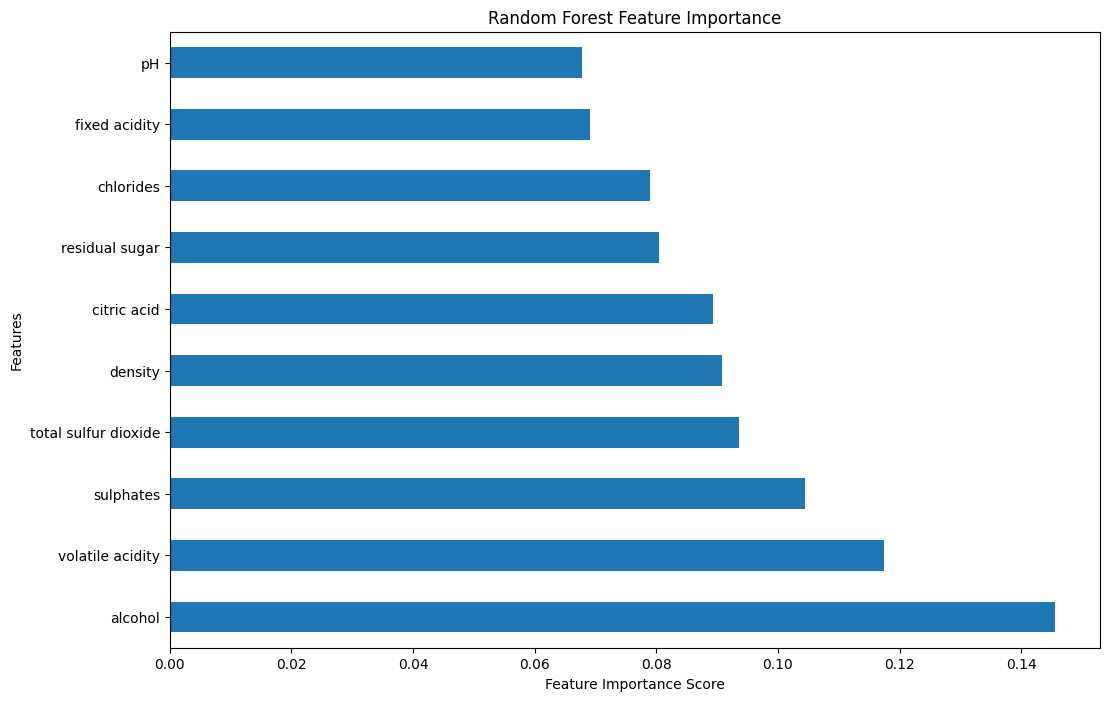

In [53]:
# The confusion matrix are plotted.
plt.figure(figsize=(8, 6))
sns.heatmap(rf_confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature importance is plotted
plt.figure(figsize=(12, 8))
rf_feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
rf_feature_importances.nlargest(10).plot(kind='barh')
plt.title('Random Forest Feature Importance')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

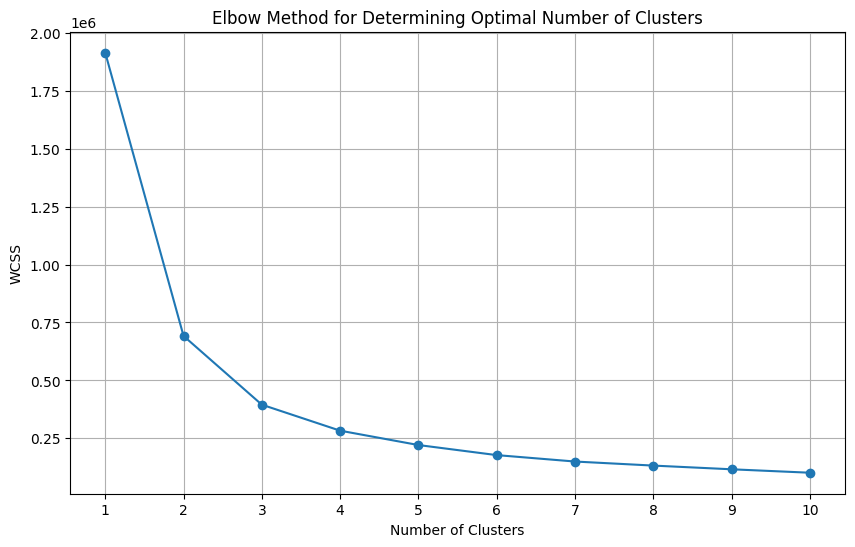

In [54]:
# Elbow method to find the number of clusters.
mean = []
for k in range(1,11):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(X)
  mean.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), mean, marker='o')
plt.title('Elbow Method for Determining Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1, 11, step=1))
plt.grid(True)
plt.show()


In [55]:
#scikit-learn.org. (n.d.). sklearn.metrics.adjusted_rand_score — scikit-learn 0.23.1 documentation. [online] Available at: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html.
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X)

# Evaluate Clustering: Adjusted Rand Index (ARI) provides a more accurate measure of similarity between clusters by accounting for chance agreements.
ari_score = adjusted_rand_score(y, clusters)
print("Adjusted Rand Index (ARI) for K-Means:", ari_score)

Adjusted Rand Index (ARI) for K-Means: -0.034435102401244054


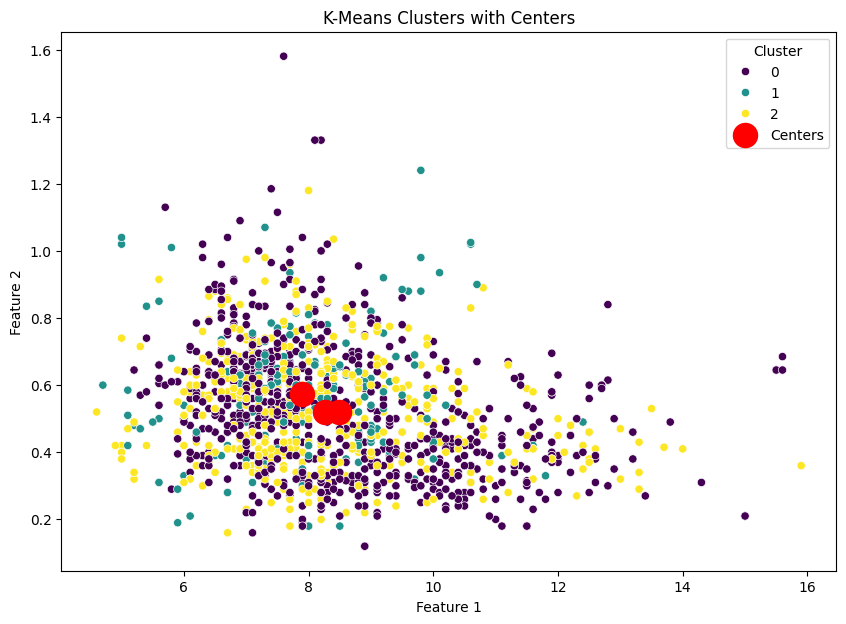

In [56]:

# Cluster centers are plotted.
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=clusters, palette='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centers')
plt.title('K-Means Clusters with Centers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Cluster')
plt.show()

In [57]:
#The final results are represented in a DataFrame format.
results = {
    'Model': ['Linear SVM', "RBF SVM" ,'MLP', 'CNN', 'KMeans Clustering','RandomForest', "KNeighborsClassifier_score"],
    'Accuracy': [svc_acc_score,svc_rbf_acc_score,mlp_acc_score,cnn_acc_score,ari_score,rf_acc_score,knn_acc_score]
}

results_df = pd.DataFrame(results)
print(results_df)


                        Model  Accuracy
0                  Linear SVM  0.818750
1                     RBF SVM  0.840625
2                         MLP  0.840625
3                         CNN  0.853125
4           KMeans Clustering -0.034435
5                RandomForest  0.868750
6  KNeighborsClassifier_score  0.843750


<ipython-input-58-d609b53ae606>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis')


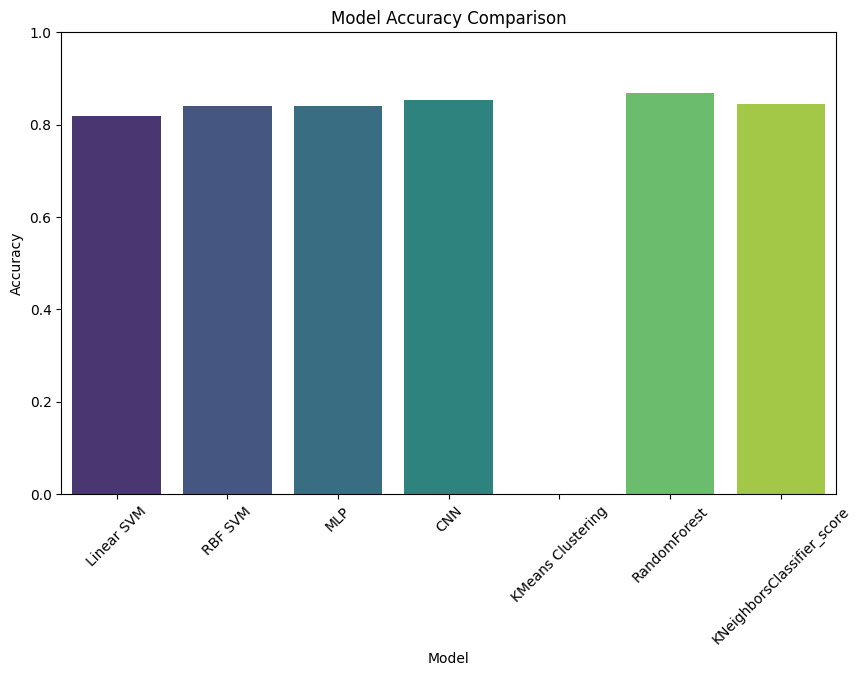

In [58]:
#Presentation of result in the barplot.
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Assuming accuracy is between 0 and 1
plt.show()
